In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
%matplotlib inline

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
RainCBE = pd.read_csv('RainCBE.csv', parse_dates=['YYYYMM'], index_col='YYYYMM',date_parser=dateparse)
RainCBE.head()
RainCBE = RainCBE.drop(['Unnamed: 0'], axis = 1)
#RainCBE.columns = ['YYYYMM','Rainfall']
RainCBE.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', name='YYYYMM', length=1224, freq=None)

In [3]:
ts = RainCBE['Rainfall']
ts.head(10)

YYYYMM
1901-01-01     21.577
1901-02-01     14.317
1901-03-01     31.208
1901-04-01    152.602
1901-05-01    215.752
1901-06-01    524.981
1901-07-01    357.626
1901-08-01    198.971
1901-09-01    295.498
1901-10-01    156.861
Name: Rainfall, dtype: float64

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

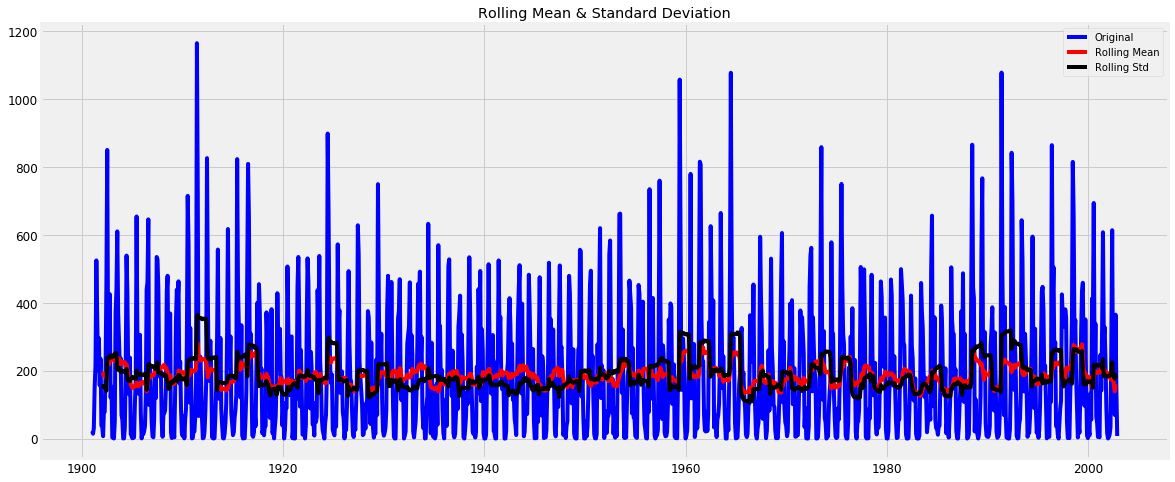

Results of Dickey-Fuller Test:
Test Statistic                -6.998917e+00
p-value                        7.408719e-10
#Lags Used                     2.300000e+01
Number of Observations Used    1.200000e+03
Critical Value (1%)           -3.435811e+00
Critical Value (5%)           -2.863952e+00
Critical Value (10%)          -2.568054e+00
dtype: float64


In [29]:
test_stationarity(ts)

In [5]:
#Test statistic is less than critical value => Null hypothesis can be rejected => Series is stationary 

In [6]:
RainCBE['Rainfall'].min()

0.07200000000000001

In [7]:
RainCBE['Rainfall'].max()

1165.135

In [8]:
ts

YYYYMM
1901-01-01     21.577
1901-02-01     14.317
1901-03-01     31.208
1901-04-01    152.602
1901-05-01    215.752
1901-06-01    524.981
1901-07-01    357.626
1901-08-01    198.971
1901-09-01    295.498
1901-10-01    156.861
1901-11-01    235.226
1901-12-01     38.231
1902-01-01     34.256
1902-02-01      6.980
1902-03-01     80.285
1902-04-01     78.620
1902-05-01    200.446
1902-06-01    459.060
1902-07-01    850.572
1902-08-01    267.312
1902-09-01    204.457
1902-10-01    425.638
1902-11-01    120.381
1902-12-01    153.379
1903-01-01      3.118
1903-02-01      2.788
1903-03-01      0.253
1903-04-01     49.311
1903-05-01    373.380
1903-06-01    439.518
               ...   
2000-07-01    370.297
2000-08-01    694.243
2000-09-01    197.534
2000-10-01    338.126
2000-11-01     65.536
2000-12-01     45.241
2001-01-01      4.690
2001-02-01      8.357
2001-03-01      3.670
2001-04-01    246.930
2001-05-01    141.457
2001-06-01    330.071
2001-07-01    607.994
2001-08-01    296.327
200

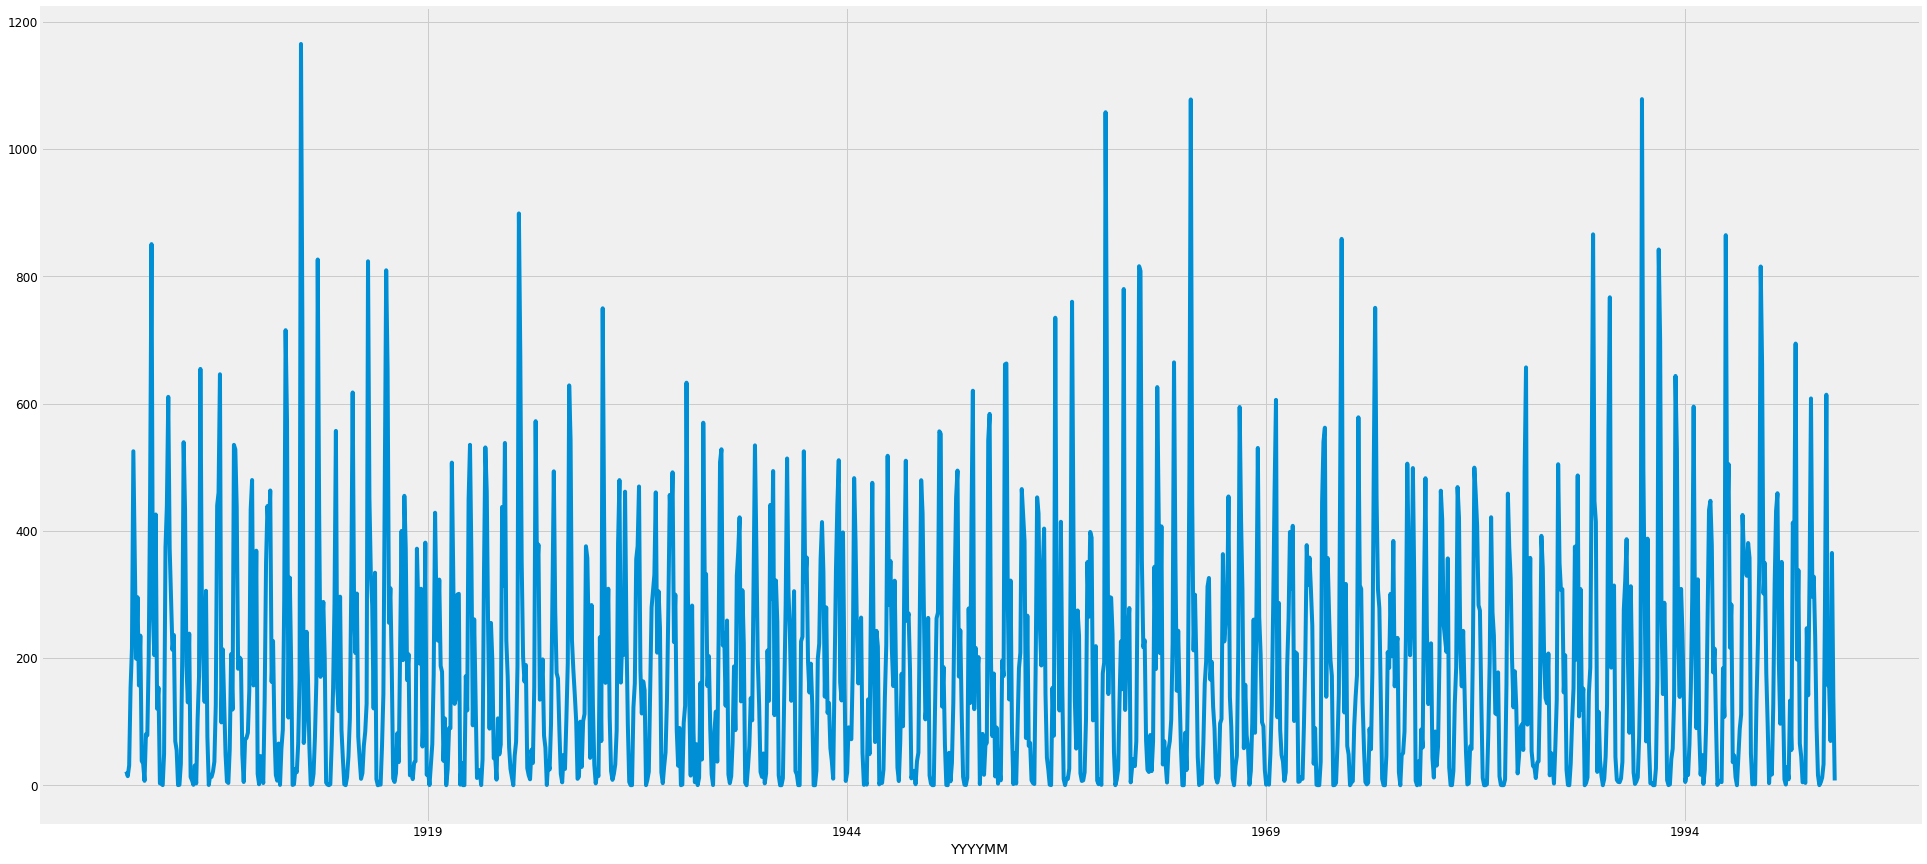

In [9]:
ts.plot(figsize=(30, 15))
plt.show()

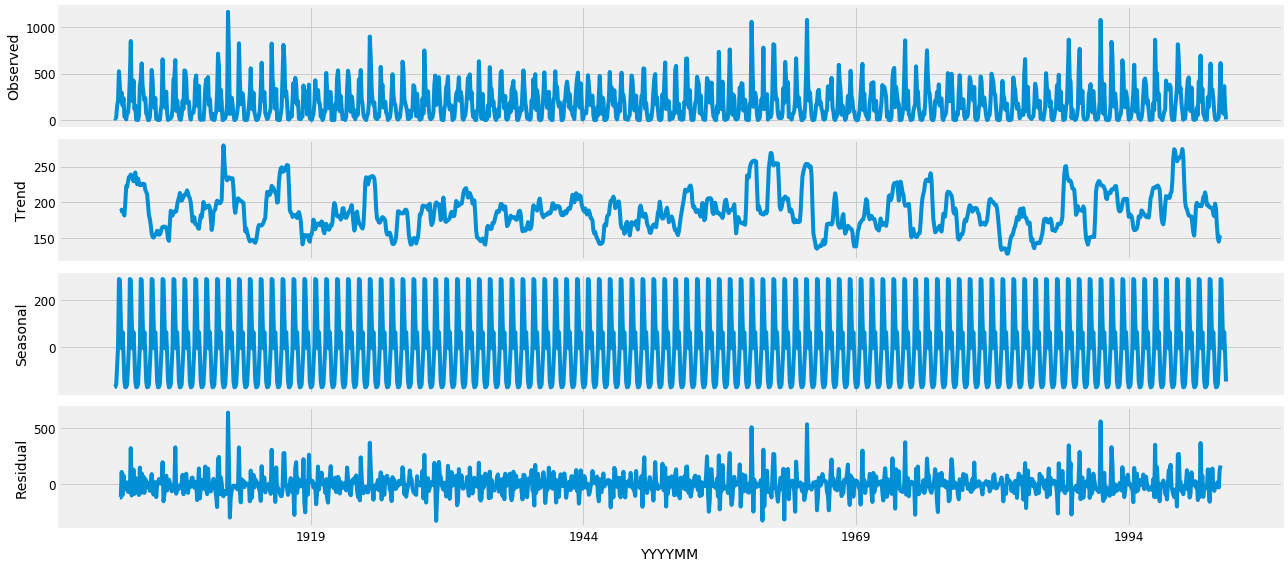

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:17121.874503635045
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16252.582634406172
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15432.780973551322
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:14547.487422276548
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15357.061092822569
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:14708.566703767052
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:14968.472709856354
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:14547.983254007906
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16469.26324486476
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:15912.58142821274
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:15420.728003047096
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:14535.974493653988
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:15345.640464544273
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:14697.447272417608
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:14968.85776019425
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:14536.418822011103
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:16224.607493795498
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:15909.41988389

C:\Users\HP PC\Anaconda2\envs\Analytics\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:14988.460845519507
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:14932.80791504828


C:\Users\HP PC\Anaconda2\envs\Analytics\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:14537.07186883357
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:16202.135203887783
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:15833.441681115019
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:15935.55697461526
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:15055.06413329686
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:15652.793421006883
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:15221.547066876115
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:15474.112715647843
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:15054.420646626733
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:15916.612002583788
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:15487.417079536295
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:15417.116798695777
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:14538.401796236198
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:15230.901072842156


C:\Users\HP PC\Anaconda2\envs\Analytics\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:14701.324358737378
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:14954.383412039679
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:14539.574819867901


In [13]:
#ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:14536.107558009558 lowest

In [14]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4134      0.394     -1.049      0.294      -1.185       0.359
ma.L1          0.4687      0.386      1.215      0.224      -0.287       1.225
ma.S.L12      -1.0000     21.135     -0.047      0.962     -42.423      40.423
sigma2       1.04e+04    2.2e+05      0.047      0.962   -4.21e+05    4.41e+05


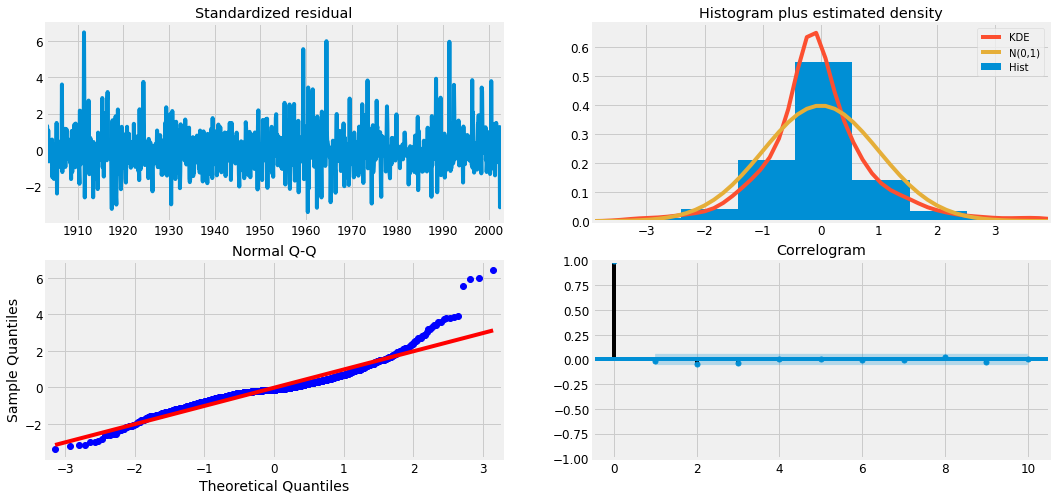

In [15]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

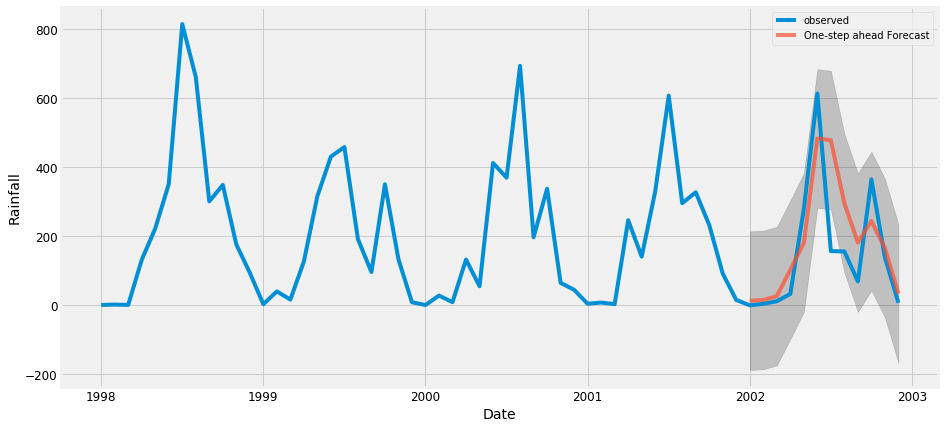

In [16]:
pred = results.get_prediction(start=pd.to_datetime('2002-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['1998':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()
plt.show()

In [17]:
type(pred)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [18]:
pred_ci.index

DatetimeIndex(['2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [19]:
pred_ci.iloc[:, 0]

2002-01-01   -187.133910
2002-02-01   -185.117827
2002-03-01   -173.979526
2002-04-01    -97.853205
2002-05-01    -19.092422
2002-06-01    282.960362
2002-07-01    278.009817
2002-08-01     95.113805
2002-09-01    -18.906760
2002-10-01     43.532476
2002-11-01    -34.849519
2002-12-01   -167.003542
Freq: MS, Name: lower Rainfall, dtype: float64

In [20]:
pred_ci.iloc[:, 1]

2002-01-01    214.670984
2002-02-01    216.682831
2002-03-01    227.809152
2002-04-01    303.932858
2002-05-01    382.693068
2002-06-01    684.745727
2002-07-01    679.795154
2002-08-01    496.899135
2002-09-01    382.878569
2002-10-01    445.317805
2002-11-01    366.935810
2002-12-01    234.781781
Freq: MS, Name: upper Rainfall, dtype: float64

In [21]:
y_forecasted = pred.predicted_mean
y_truth = ts['2002-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 15261.85


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 123.54


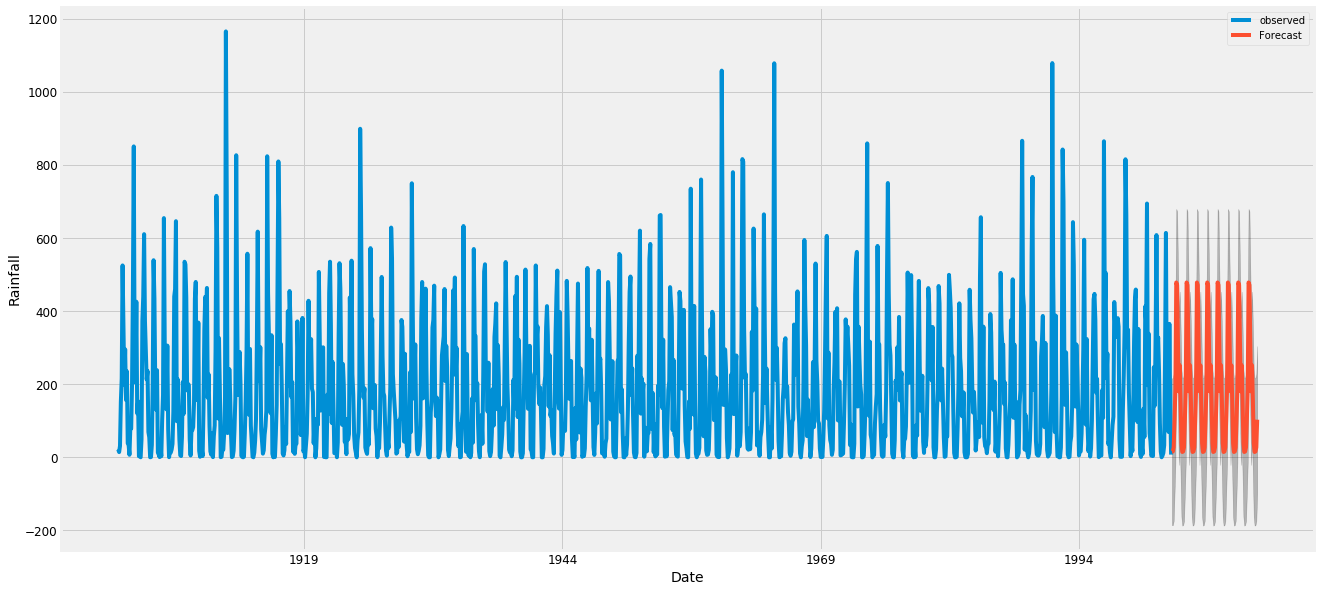

In [23]:
#fig=plt.figure(figsize=(50, 30), dpi= 200)

pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(20, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Rainfall')
plt.legend()
plt.show()

In [24]:
pred_uc

In [25]:
yhat = results.forecast(100)

In [26]:
yhat

2003-01-01     15.322454
2003-02-01     15.715910
2003-03-01     27.360637
2003-04-01    102.921597
2003-05-01    186.340561
2003-06-01    478.314440
2003-07-01    471.447980
2003-08-01    314.019414
2003-09-01    180.516846
2003-10-01    251.914034
2003-11-01    156.562436
2003-12-01     38.913904
2004-01-01     14.581131
2004-02-01     16.022360
2004-03-01     27.233956
2004-04-01    102.973965
2004-05-01    186.318913
2004-06-01    478.323389
2004-07-01    471.444281
2004-08-01    314.020943
2004-09-01    180.516214
2004-10-01    251.914295
2004-11-01    156.562328
2004-12-01     38.913948
2005-01-01     14.581113
2005-02-01     16.022368
2005-03-01     27.233953
2005-04-01    102.973966
2005-05-01    186.318912
2005-06-01    478.323389
                 ...    
2008-11-01    156.562328
2008-12-01     38.913948
2009-01-01     14.581113
2009-02-01     16.022368
2009-03-01     27.233953
2009-04-01    102.973966
2009-05-01    186.318912
2009-06-01    478.323389
2009-07-01    471.444281


In [27]:
results.predict()

1901-01-01      0.000000
1901-02-01     -4.459780
1901-03-01     -2.171203
1901-04-01     -6.253017
1901-05-01    -31.447877
1901-06-01    -39.959731
1901-07-01   -104.513429
1901-08-01    -55.804039
1901-09-01    -31.514211
1901-10-01    -57.031196
1901-11-01    -22.248244
1901-12-01    -45.963873
1902-01-01     22.539884
1902-02-01      9.024105
1902-03-01     33.835908
1902-04-01    149.063577
1902-05-01    212.259325
1902-06-01    521.598622
1902-07-01    351.529122
1902-08-01    225.848003
1902-09-01    283.949532
1902-10-01    155.054391
1902-11-01    248.750194
1902-12-01     24.472258
1903-01-01     46.788101
1903-02-01    -19.774852
1903-03-01     67.156846
1903-04-01    108.037025
1903-05-01    207.214087
1903-06-01    499.237650
                 ...    
2000-07-01    474.534930
2000-08-01    306.070684
2000-09-01    203.877252
2000-10-01    239.860411
2000-11-01    167.972995
2000-12-01     29.738499
2001-01-01     19.669672
2001-02-01     13.380691
2001-03-01     28.513588


In [28]:
date = input("Enter a date to get predicted rainfall (YYYY-MM-01) - ")
forecast = results.forecast(pd.to_datetime(date))
forecast[len(forecast)-1]

Enter a date to get predicted rainfall (YYYY-MM-01) - 2018-11-01


156.5623278531822